In [2]:
from keras.datasets import mnist

from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential

from keras.utils import np_utils, plot_model
from keras.utils import to_categorical
from keras.callbacks import Callback

import matplotlib.pyplot as plt

In [3]:
batch_size = 128 
epochs = 6
num_classes = 10 #class of data i.e. numbers from 0 to 9 i.e. 10 numbers
img_x, img_y = 28, 28 #dimensions of the image

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_test.shape)

(10000, 28, 28)


In [5]:
#resizing the data set into a 4D tensor
#reshape(number of samples, x_img_size, y_img_size, no of channels)
#grayscale img so channels = 1
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalising the images
x_train /= 255
x_test /= 255

In [6]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
#creating the output matrix as a categorical dataset
Y_train = np_utils.to_categorical(y_train, 10)
Y_test  = np_utils.to_categorical(y_test, 10)

In [8]:
#defining the baseline model!
def baseline_model():
    model = Sequential()
    model.add(Conv2D(32, 
                    kernel_size =(5,5),  #kernel size for CNN
                    activation  = 'relu',#actication function, rectified linear unit
                    input_shape = input_shape)) #shape of input tensor
    
    #reducing the dimension of the feature map with pooling
    #pooling size = 2*2, max pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64,#total of 64 filters
                     kernel_size = (5,5), #kernel size = 5*5
                     activation = 'relu')) #actication function, rectified linear unit
    #second pooling layer to reduce dimension
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss = 'categorical_crossentropy',
                 optimizer = 'adam',
                 metrics = ['accuracy'])
    return model

In [9]:
model = baseline_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                65600     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

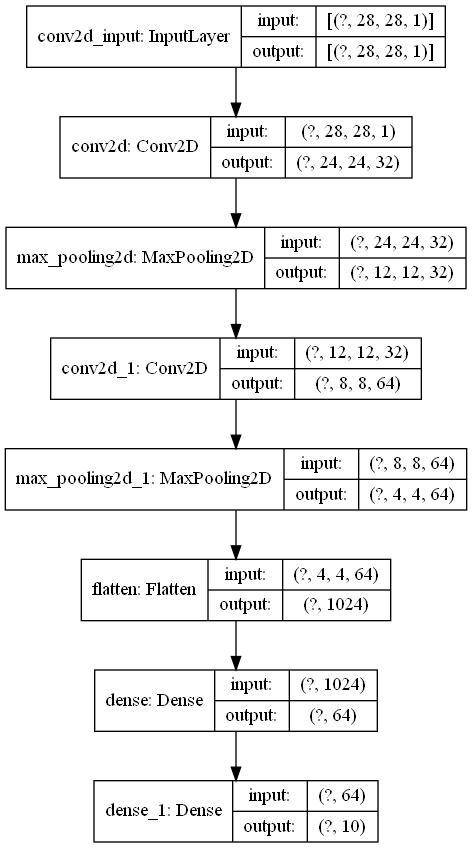

In [10]:
plot_model(model,
          to_file = "model.jpg",
          show_shapes = True,
          show_layer_names = True,
          rankdir = "TB",
          expand_nested = False,
          dpi = 96)

In [11]:
print(x_train.shape)
print(Y_train.shape)

print(x_test.shape)
print(Y_test.shape)

print(batch_size)
model_log = model.fit(x_train, Y_train,
                     batch_size = batch_size,
                     epochs = epochs,
                     verbose = 1, #provide detailed report after each epoch
                     validation_data = (x_test, Y_test))

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)
128
Epoch 1/6
469/469 [==============================] - 25s 53ms/step - loss: 0.2102 - accuracy: 0.9373 - val_loss: 0.0539 - val_accuracy: 0.9843
Epoch 2/6
469/469 [==============================] - 25s 53ms/step - loss: 0.0524 - accuracy: 0.9839 - val_loss: 0.0335 - val_accuracy: 0.9894
Epoch 3/6
469/469 [==============================] - 26s 55ms/step - loss: 0.0376 - accuracy: 0.9883 - val_loss: 0.0329 - val_accuracy: 0.9889
Epoch 4/6
469/469 [==============================] - 25s 54ms/step - loss: 0.0277 - accuracy: 0.9910 - val_loss: 0.0283 - val_accuracy: 0.9898
Epoch 5/6
469/469 [==============================] - 25s 53ms/step - loss: 0.0230 - accuracy: 0.9927 - val_loss: 0.0261 - val_accuracy: 0.9917
Epoch 6/6
469/469 [==============================] - 26s 55ms/step - loss: 0.0189 - accuracy: 0.9942 - val_loss: 0.0339 - val_accuracy: 0.9895


In [19]:
def evaluate_model(model, model_log):
    print(model_log.history['loss'])
    print("train loss = ", model_log.history['loss'][-1])
    print("train accuracy = ", model_log.history['accuracy'][-1])
          
    print("test loss = ", model_log.history['val_loss'][-1])
    print("test accuracy = ", model_log.history['val_accuracy'][-1])
    
    
    plt.subplot(2,1,1)
    plt.title('model accuracy')
    plt.plot(range(1, epochs+1), model_log.history['accuracy'])
    plt.plot(range(1,  epochs+1), model_log.history['val_accuracy'])
    
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')
    
    plt.subplot(2,1,2)
    plt.title('model loss')
    plt.plot(model_log.history['loss'])
    plt.plot(model_log.history['val_loss'])
    
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'test'], loc='lower right')
    
    plt.tight_layout()
    return

[0.21016032993793488, 0.05235075578093529, 0.03755521774291992, 0.027729805558919907, 0.022962916642427444, 0.0188797265291214]
train loss =  0.0188797265291214
train accuracy =  0.9942166805267334
test loss =  0.033878739923238754
test accuracy =  0.9894999861717224


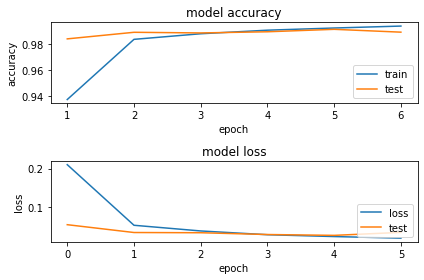

In [20]:
evaluate_model(model, model_log)
# after 4-5 epochs the model starts to over fit so set the number of epochs to 6

In [14]:
#defining the small model!
def small_model():
    model = Sequential()
    model.add(Conv2D(32, 
                    kernel_size =(5,5),  #kernel size for CNN
                    activation  = 'relu',#actication function, rectified linear unit
                    input_shape = input_shape)) #shape of input tensor
    
    #reducing the dimension of the feature map with pooling
    #pooling size = 2*2, max pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64,#total of 64 filters
                     kernel_size = (3,3), #kernel size of base = 5*5
                     activation = 'relu')) #actication function, rectified linear unit
    #second pooling layer to reduce dimension
    model.add(MaxPooling2D(pool_size=(5, 5)))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss = 'categorical_crossentropy',
                 optimizer = 'adam',
                 metrics = ['accuracy'])
    return model

In [15]:
smol_model = small_model()
smol_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

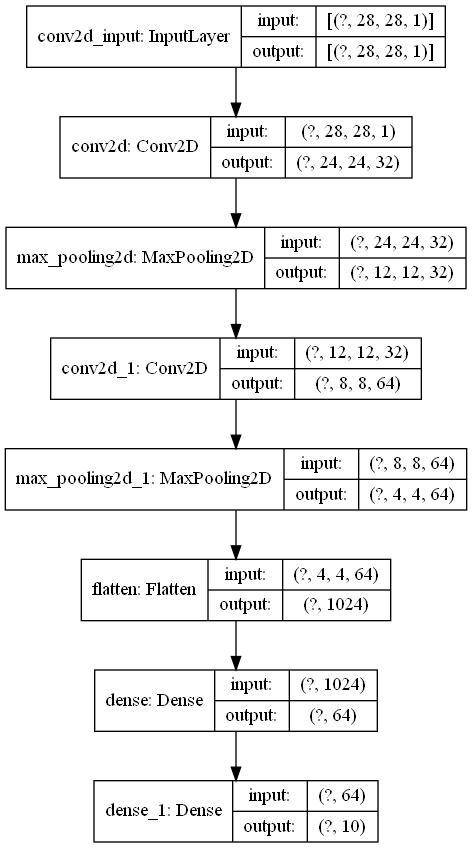

In [16]:
plot_model(model,
          to_file = "model.jpg",
          show_shapes = True,
          show_layer_names = True,
          rankdir = "TB",
          expand_nested = False,
          dpi = 96)

In [17]:
smol_model_log = smol_model.fit(x_train, Y_train,
                     batch_size = batch_size,
                     epochs = epochs,
                     verbose = 1, #provide detailed report after each epoch
                     validation_data = (x_test, Y_test))

Epoch 1/6
469/469 [==============================] - 22s 46ms/step - loss: 0.3115 - accuracy: 0.9161 - val_loss: 0.0829 - val_accuracy: 0.9744
Epoch 2/6
469/469 [==============================] - 21s 45ms/step - loss: 0.0741 - accuracy: 0.9772 - val_loss: 0.0545 - val_accuracy: 0.9839
Epoch 3/6
469/469 [==============================] - 21s 45ms/step - loss: 0.0553 - accuracy: 0.9831 - val_loss: 0.0515 - val_accuracy: 0.9839
Epoch 4/6
469/469 [==============================] - 22s 46ms/step - loss: 0.0433 - accuracy: 0.9863 - val_loss: 0.0420 - val_accuracy: 0.9867
Epoch 5/6
469/469 [==============================] - 22s 47ms/step - loss: 0.0360 - accuracy: 0.9892 - val_loss: 0.0417 - val_accuracy: 0.9865
Epoch 6/6
469/469 [==============================] - 22s 47ms/step - loss: 0.0320 - accuracy: 0.9898 - val_loss: 0.0376 - val_accuracy: 0.9886


train loss =  0.03198006749153137
train accuracy =  0.9897833466529846
test loss =  0.03759327903389931
test accuracy =  0.9886000156402588


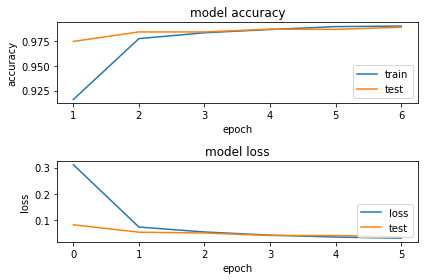

In [18]:
evaluate_model(smol_model, smol_model_log)